# Proyek Analisis Data
- **Nama:** Rizky Pratama
- **Email:** rizky.pratama27an@student.uns.ac.id
- **ID Dicoding:** prtmrzky

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap tingkat polusi udara (PM2.5, NO2, CO)
- Bagaimana karakteristik polusi udara di berbagai waktu ( tahun, bulan, jam)

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas matplotlib seaborn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data.csv to PRSA_Data.csv


In [ ]:
air_data = pd.read_csv('PRSA_Data.csv')  # Replace 'your_file_name.csv' with the actual file name.
air_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
air_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Dataset berhasil diimpor dengan kolom-kolom yang merepresentasikan waktu, cuaca, dan tingkat polusi.
- Dataset memiliki x baris dan y kolom.



### Assessing Data

In [ ]:
missing_value = air_data.isnull().sum()
print(f"Nilai yang hilang : \n{missing_value}")

Nilai yang hilang : 
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


In [ ]:
duplicates = air_data.duplicated().sum()
print(f"Jumlah Data yang Duplikasi :{duplicates}")

Jumlah Data yang Duplikasi :0


In [ ]:
data_type = air_data.dtypes
print(f"Tipe Data dari masing-masing field : \n{data_type}")

Tipe Data dari masing-masing field : 
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


**Insight:**
- Terdapat missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM
- Tidak terdapat data yang sama atau duplicate

### Cleaning Data

In [ ]:
# List kolom numerik
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


# Menerapkan interpolasi hanya pada kolom numerik menggunakan loop
for col in numeric_cols:
    air_data[col].interpolate(method='linear', limit_direction='forward', inplace=True)




# Data yang bukan Numerik
# Isi missing values pada kolom kategori dengan metode forward fill
air_data['wd'].fillna(method='ffill', inplace=True)


Missing_value = air_data.isnull().sum()
print(f"Menghilangkan Missing Value dengan 2 Metode \nHasil : \n{Missing_value}\n")


Menghilangkan Missing Value dengan 2 Metode 
Hasil : 
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64



<ipython-input-15-34c1bc9977c6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_data[col].interpolate(method='linear', limit_direction='forward', inplace=True)
<ipython-input-15-34c1bc9977c6>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_data['wd'].fillna(method='ffill', inplace=True)


In [ ]:
# List kolom numerik
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


# Menerapkan interpolasi hanya pada kolom numerik menggunakan loop
for col in numeric_cols:
    air_data[col].interpolate(method='linear', limit_direction='forward', inplace=True)




# Data yang bukan Numerik
# Isi missing values pada kolom kategori dengan metode forward fill
air_data['wd'].fillna(method='ffill', inplace=True)


Missing_value = air_data.isnull().sum()
print(f"Menghilangkan Missing Value dengan 2 Metode \nHasil : \n{Missing_value}\n")


Menghilangkan Missing Value dengan 2 Metode 
Hasil : 
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64



<ipython-input-15-34c1bc9977c6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_data[col].interpolate(method='linear', limit_direction='forward', inplace=True)
<ipython-input-15-34c1bc9977c6>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_data['wd'].fillna(method='ffill', inplace=True)


In [ ]:
# List kolom numerik
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Menerapkan interpolasi hanya pada kolom numerik menggunakan loop
for col in numeric_cols:
    air_data[col] = air_data[col].interpolate(method='linear', limit_direction='forward')

# Data yang bukan Numerik
# Isi missing values pada kolom kategori dengan metode forward fill
air_data['wd'] = air_data['wd'].ffill()

# Memeriksa apakah missing value telah hilang
Missing_value = air_data.isnull().sum()
print(f"Menghilangkan Missing Value dengan 2 Metode \nHasil : \n{Missing_value}\n")


Menghilangkan Missing Value dengan 2 Metode 
Hasil : 
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64



**Insight:**
- Looping Kolom: for col in numeric_cols: memungkinkan iterasi melalui setiap kolom yang didefinisikan dalam numeric_cols.
- Interpolasi Setiap Kolom: air_data[col].interpolate(...) memastikan interpolasi hanya dilakukan pada kolom numerik dalam DataFrame.
- inplace=True: Memastikan perubahan dilakukan langsung pada DataFrame tanpa membuat salinan baru.


## Exploratory Data Analysis (EDA)

### Explore ...

Bagaimana pengaruh faktor cuaca terhadap tingkat polusi udara (PM2.5, NO2, CO)

In [ ]:
# Pastikan kolom-kolomnya benar
weather_effects = air_data.groupby(['PM2.5','PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN']).agg({
    'RAIN': ['sum', 'max', 'min', 'mean', 'std']
}).reset_index()

weather_effects.head()



PM2.5 PM10  SO2   NO2     CO     O3 RAIN                        
                                            sum  max  min mean std
0   3.0  3.0  2.0   8.0  300.0  109.0  0.0  0.0  0.0  0.0  0.0 NaN
1   3.0  3.0  2.0  10.0  400.0   98.0  0.0  0.0  0.0  0.0  0.0 NaN
2   3.0  3.0  2.0  15.0  300.0   85.0  0.0  0.0  0.0  0.0  0.0 NaN
3   3.0  3.0  2.0  18.0  200.0   67.0  0.0  0.0  0.0  0.0  0.0 NaN
4   3.0  3.0  2.0  25.0  100.0   46.0  0.4  0.4  0.4  0.4  0.4 NaN

Bagaimana karakteristik polusi udara di berbagai waktu ( tahun, bulan, jam)

In [ ]:
# Mengelompokkan data berdasarkan tahun, bulan, jam, dan menghitung statistik dari metrik polusi
d1 = air_data.groupby(['year', 'month', 'day', 'hour']).agg({
    'PM10': ['sum', 'max', 'min', 'mean', 'std'],
    'SO2': ['sum', 'max', 'min', 'mean', 'std'],
    'NO2': ['sum', 'max', 'min', 'mean', 'std'],
    'CO': ['sum', 'max', 'min', 'mean', 'std'],
    'O3': ['sum', 'max', 'min', 'mean', 'std']
}).reset_index()

# Tampilkan 5 baris pertama hasilnya
d1.head()


year month day hour PM10                      SO2  ...     CO         \
                        sum  max  min mean std   sum  ...    sum    max   
0  2013     3   1    0  4.0  4.0  4.0  4.0 NaN   4.0  ...  300.0  300.0   
1  2013     3   1    1  8.0  8.0  8.0  8.0 NaN   4.0  ...  300.0  300.0   
2  2013     3   1    2  7.0  7.0  7.0  7.0 NaN   5.0  ...  300.0  300.0   
3  2013     3   1    3  6.0  6.0  6.0  6.0 NaN  11.0  ...  300.0  300.0   
4  2013     3   1    4  3.0  3.0  3.0  3.0 NaN  12.0  ...  300.0  300.0   

                       O3                        
     min   mean std   sum   max   min  mean std  
0  300.0  300.0 NaN  77.0  77.0  77.0  77.0 NaN  
1  300.0  300.0 NaN  77.0  77.0  77.0  77.0 NaN  
2  300.0  300.0 NaN  73.0  73.0  73.0  73.0 NaN  
3  300.0  300.0 NaN  72.0  72.0  72.0  72.0 NaN  
4  300.0  300.0 NaN  72.0  72.0  72.0  72.0 NaN  

[5 rows x 29 columns]

**Insight:**
- Dalam tabel pertama, data menunjukkan bahwa RAIN (hujan) tidak memiliki nilai yang signifikan (semua nilai hujan adalah 0.0, kecuali satu kasus dengan 0.4), sehingga sulit untuk menilai pengaruh hujan terhadap tingkat polusi udara berdasarkan data ini.
- Berdasarkan sampel ini, tidak ada fluktuasi besar dalam konsentrasi polutan berdasarkan waktu. Nilai maksimum, minimum, dan rata-rata dari polutan tampak stabil pada periode waktu tertentu (seperti hari, jam). Sebagai contoh, konsentrasi CO secara konsisten tetap di 300.0, sementara O3 berada di sekitar 72-77.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

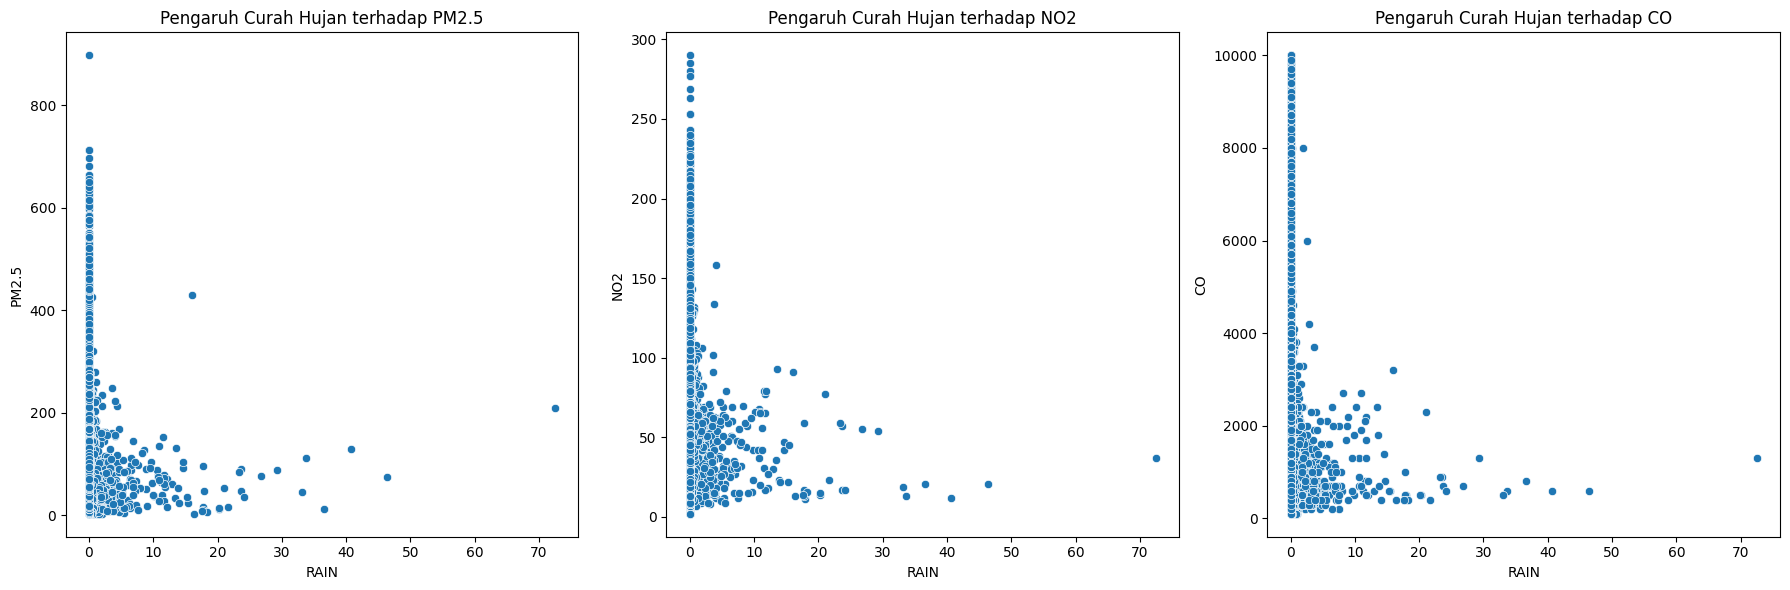

In [49]:
# Visualisasi 1: Pengaruh RAIN terhadap PM2.5, NO2, CO
plt.figure(figsize=(18,6))

# Subplot untuk PM2.5
plt.subplot(1, 3, 1)
sns.scatterplot(x='RAIN', y='PM2.5', data=air_data)
plt.title('Pengaruh Curah Hujan terhadap PM2.5')

# Subplot untuk NO2
plt.subplot(1, 3, 2)
sns.scatterplot(x='RAIN', y='NO2', data=air_data)
plt.title('Pengaruh Curah Hujan terhadap NO2')

# Subplot untuk CO
plt.subplot(1, 3, 3)
sns.scatterplot(x='RAIN', y='CO', data=air_data)
plt.title('Pengaruh Curah Hujan terhadap CO')


plt.tight_layout()
plt.show()


### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

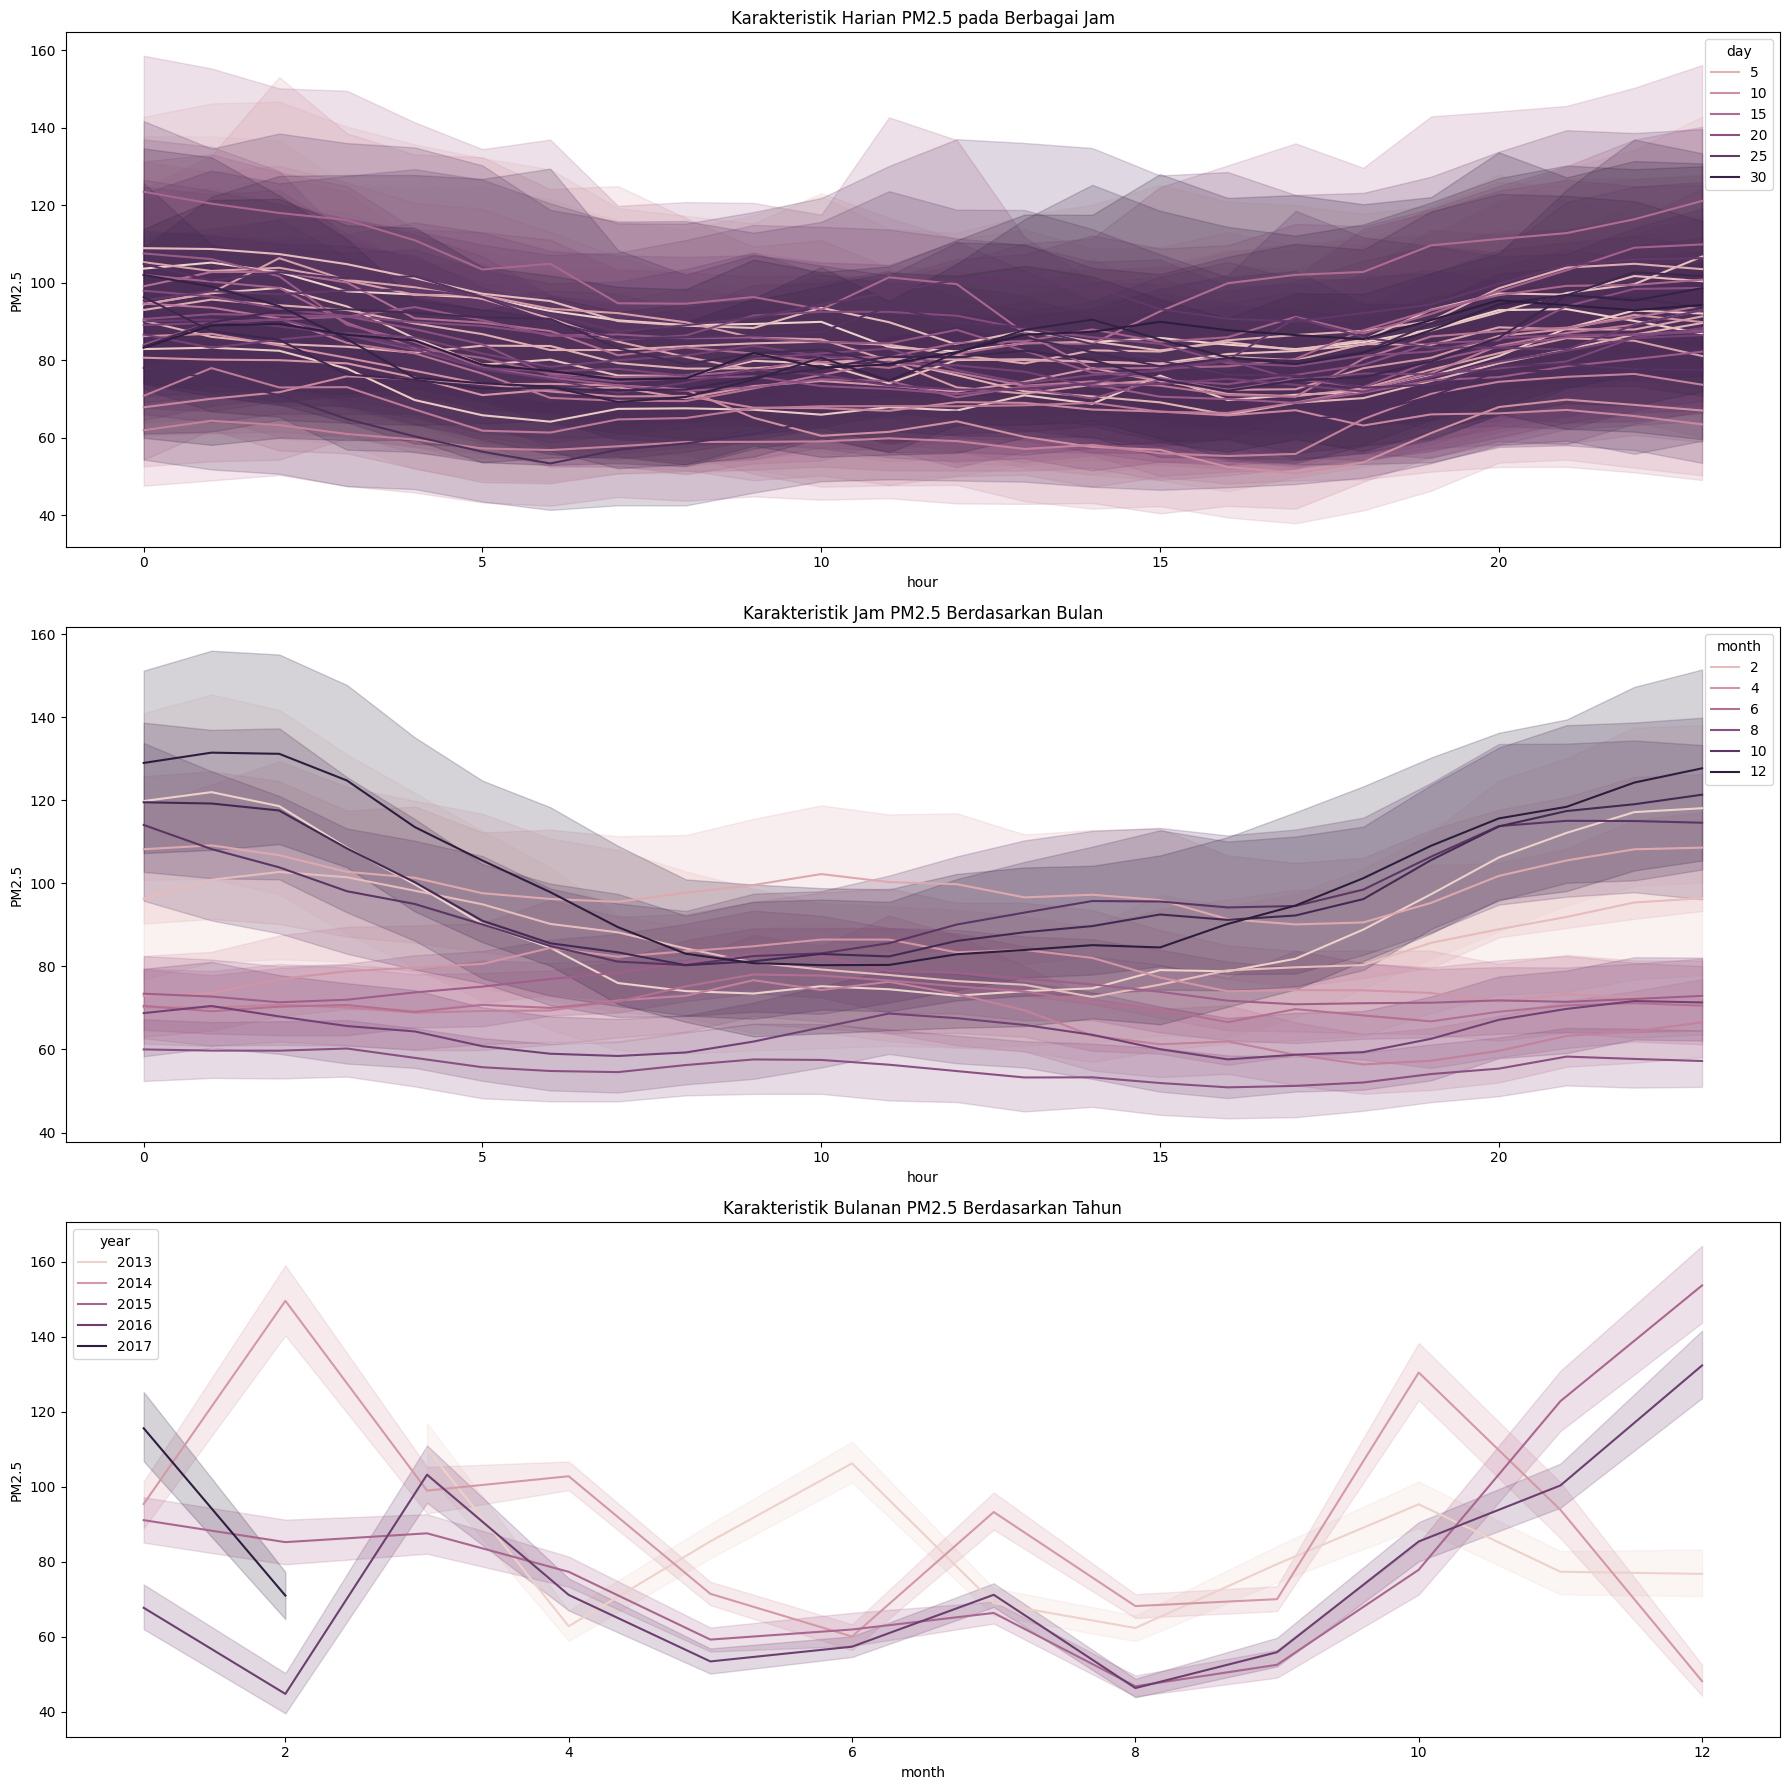

In [43]:
# Visualisasi 2: Karakteristik Polusi PM2.5 di berbagai waktu (jam, bulan, tahun)
plt.figure(figsize=(18, 18))

# Subplot untuk PM2.5 berdasarkan jam
plt.subplot(3, 1, 1)
sns.lineplot(x='hour', y='PM2.5', hue='day', data=air_data)
plt.title('Karakteristik Harian PM2.5 pada Berbagai Jam')

# Subplot untuk PM2.5 berdasarkan bulan
plt.subplot(3, 1, 2)
sns.lineplot(x='hour', y='PM2.5', hue='month', data=air_data)
plt.title('Karakteristik Jam PM2.5 Berdasarkan Bulan')

# Subplot untuk PM2.5 berdasarkan tahun
plt.subplot(3, 1, 3)
sns.lineplot(x='month', y='PM2.5', hue='year', data=air_data)
plt.title('Karakteristik Bulanan PM2.5 Berdasarkan Tahun')

plt.tight_layout()
plt.show()


**Insight:**
- PM2.5, NO2, dan CO cenderung mengalami penurunan saat curah hujan meningkat, terutama di curah hujan rendah (0-10 mm). Ada banyak titik yang terpusat di sekitar curah hujan rendah, menandakan kemungkinan penumpukan polutan saat kondisi tanpa hujan.
- Hubungan antara curah hujan dan penurunan konsentrasi polutan tampak kuat pada awalnya, tetapi menjadi tidak terlalu signifikan pada curah hujan yang lebih tinggi.

- Perubahan PM2.5 dalam satu hari di setiap jamnya, berdasarkan hari di bulan tersebut.
Pola terlihat konsisten dengan puncak PM2.5 pada waktu tertentu, seperti sore hari, sementara konsentrasi menurun pada waktu dini hari.
- pola bulanan berubah dari tahun ke tahun. Terdapat fluktuasi yang terlihat jelas di beberapa bulan, dengan puncak biasanya muncul di musim dingin (Desember-Februari).
-Beberapa tahun menunjukkan peningkatan polusi yang lebih tajam di bulan-bulan tersebut, sementara ada penurunan selama musim panas.


## Analisis Lanjutan (Opsional)

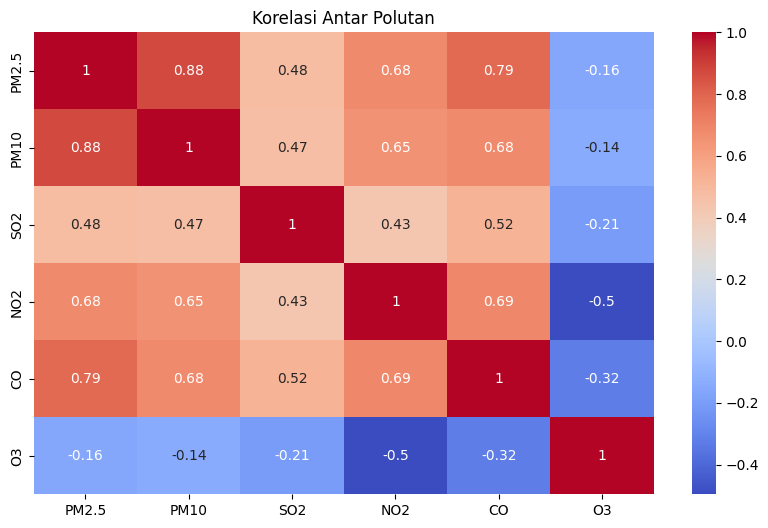

In [44]:

plt.figure(figsize=(10, 6))
sns.heatmap(air_data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Polutan')
plt.show()


## Conclusion

- Conclusion Pertanyaan 1: Pada curah hujan rendah (0-10 mm), terdapat penurunan konsentrasi polutan ini secara signifikan. Ini menunjukkan bahwa curah hujan pada level ini memiliki peran penting dalam mengurangi konsentrasi polusi udara, mungkin melalui proses pencucian partikel polutan di atmosfer.
Polusi cenderung menumpuk saat kondisi tanpa hujan atau kering, seperti yang terlihat dari banyaknya data yang terpusat di area curah hujan rendah.
Pada curah hujan yang lebih tinggi, pengaruh hujan terhadap penurunan konsentrasi polutan menjadi tidak terlalu signifikan, menandakan bahwa setelah batas tertentu, hujan mungkin tidak memberikan dampak yang lebih besar.

- Conclusion Pertanyaan 2: Secara keseluruhan, faktor waktu sangat mempengaruhi konsentrasi polutan, dengan PM2.5 dan polutan lainnya menunjukkan fluktuasi signifikan sepanjang hari, bulan, dan musim. Ini menunjukkan bahwa selain faktor cuaca, aktivitas manusia dan faktor musiman juga berperan penting dalam perubahan tingkat polusi udara.